# Predicción del Valor del Mercado, RustyBargain

---

**Notebook by:** 

Data Scientist: Julio César Martínez I.


# Tabla de Contenido

---

1. Introducción.
2. Licencia.
3. Librerías Requeridas.
4. Definición del Problema.
5. Respuesta de la Problemática.
6. Etapa Uno: Preparación de los Datos.
7. Etapa Dos: Entrenamiento del Modelo.
8. Etapa Tres: Análisis del Modelo.
9. Conclusiones.
10. Bibliografía.
11. Agradecimientos.

## || Introducción.
---

Las app son una gran fuente de datos que permiten obtener información de valor sobre los distintos perfiles de usuarios que las utilizan, así como de su comportamiento en el entorno de la app. También son muy utilizadas por las empresas para obtener y procesar datos sobre sus procesos de manera eficiente. 

Medir y analizar toda esta información es clave para generar estrategias que permitan el aumento del tiempo de uso en la app, la mejora de las recomendaciones de compra o procesos empresariales, el aumento de las ventas, de la adaptación de los productos/servicios al usuario o la visualización de anuncios, entre muchas otras.

Esto último es el caso de nuestro proyecto que desarrollaremos a continuación.

## || Licencia.
---

Copyright @2023 by Julio César Martínez Izaguirre

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License


## || Librerías Requeridas.

---

Para este proyecto en este nootebook utilizamos diferentes librerías de python como son:

- Pandas.
- NumPy.
- Matplotlib.
- Seaborn.
- Scikit-Learn.
- LightGBM.
- CatBoost.
- XGBoost.

## || Definición del Problema
---

El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial: especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.
A Rusty Bargain le interesa:
- la calidad de la predicción;
- la velocidad de la predicción;
- el tiempo requerido para el entrenamiento

## || Respuesta
---

Para resolver este proyecto vamos a entrenar diferentes modelos que a su vez se compongan con diversos hiperparámetros (al menos dos modelos diferentes, pero más es mejor. 

El punto principal es comparar métodos de potenciación del gradiente con bosque aleatorio, árbol de decisión y regresión lineal.

## || Etapa Uno: Preparación de datos
---

Importamos librerías

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import lightgbm
import catboost
import xgboost

from sklearn.preprocessing import MaxAbsScaler, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

pd.options.display.max_rows = 200
%matplotlib inline

start_time = time.time()

print("Pandas Version:      ", pd.__version__)
print("Numpy Version :      ", np.__version__)
print("Seaborn Versión:     ", sns.__version__)
print("Scikit-Learn Version:", sklearn.__version__)
print("LightGBM Version:    ", lightgbm.__version__)

Pandas Version:       1.2.4
Numpy Version :       1.21.1
Seaborn Versión:      0.11.1
Scikit-Learn Version: 0.24.1
LightGBM Version:     3.3.1


Cargamos Dataframe

In [2]:
rb_df = pd.read_csv('/datasets/car_data.csv', parse_dates=['DateCrawled', 'DateCreated','LastSeen'])

### Análisis Exploratorio

Mostramos primera y últimas filas.

In [3]:
rb_df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:00,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-07-04 03:16:00
1,2016-03-24 10:58:00,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-07-04 01:46:00
2,2016-03-14 12:52:00,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-05-04 12:47:00
3,2016-03-17 16:54:00,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:00
4,2016-03-31 17:25:00,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-06-04 10:17:00


In [4]:
rb_df.tail()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
354364,2016-03-21 09:50:00,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21,0,2694,2016-03-21 10:42:00
354365,2016-03-14 17:48:00,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14,0,39576,2016-06-04 00:46:00
354366,2016-05-03 19:56:00,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-05-03,0,26135,2016-11-03 18:17:00
354367,2016-03-19 18:57:00,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19,0,87439,2016-07-04 07:15:00
354368,2016-03-20 19:41:00,3400,wagon,2002,manual,100,golf,150000,6,gasoline,volkswagen,NaN,2016-03-20,0,40764,2016-03-24 12:45:00


In [5]:
print("Total de Columnas en el Dataset:", rb_df.shape[1])
print("Total de Filas en el Dataset:   ", rb_df.shape[0])

Total de Columnas en el Dataset: 16
Total de Filas en el Dataset:    354369


En una primera impresión podemos ver que hay un error con el nombre de las columnas debido a que la letra inicial está escrita con mayúsuclas, vamos a cambiarlas por algo más apropiado.

In [6]:
rb_df = rb_df.rename(columns={'DateCrawled': 'date_crawled',
                        'Price'            : 'price',
                        'VehicleType'      : 'vehicle_type',
                        'RegistrationYear' : 'registration_year',
                        'Gearbox'          : 'gearbox',
                        'Power'            : 'power',
                        'Model'            : 'model',
                        'Mileage'          : 'mileage',
                        'RegistrationMonth': 'registration_month',
                        'FuelType'         : 'fuel_type',
                        'Brand'            : 'brand',
                        'NotRepaired'      : 'not_repaired',
                        'DateCreated'      : 'date_created',
                        'NumberOfPictures' : 'number_of_pictures',
                        'PostalCode'       : 'postal_code',
                        'LastSeen'         : 'last_seen'})

In [7]:
rb_df.columns.to_list()

['date_crawled',
 'price',
 'vehicle_type',
 'registration_year',
 'gearbox',
 'power',
 'model',
 'mileage',
 'registration_month',
 'fuel_type',
 'brand',
 'not_repaired',
 'date_created',
 'number_of_pictures',
 'postal_code',
 'last_seen']

Hay un problema con las columnas que incluyen fechas. 

Cambiamos de `objet` a `datetime`

In [8]:
#rb_df['date_crawled'] = pd.to_datetime(rb_df['date_crawled'])
#rb_df['date_created'] = pd.to_datetime(rb_df['date_created'])
#rb_df['last_seen']    = pd.to_datetime(rb_df['last_seen'])

Verificamos cambios

In [9]:
rb_df.dtypes

date_crawled          datetime64[ns]
price                          int64
vehicle_type                  object
registration_year              int64
gearbox                       object
power                          int64
model                         object
mileage                        int64
registration_month             int64
fuel_type                     object
brand                         object
not_repaired                  object
date_created          datetime64[ns]
number_of_pictures             int64
postal_code                    int64
last_seen             datetime64[ns]
dtype: object

Revisamos **Valores Duplicados**

In [10]:
rb_df.duplicated().sum()

262

Corregimos y eliminamos

In [11]:
rb_df = rb_df.drop_duplicates().reset_index(drop=True)

Comprobamos los cambios

In [12]:
rb_df.duplicated().sum()

0

Revisión de **Datos Nulos/Ausentes**

In [13]:
rb_df.isna().sum()

date_crawled              0
price                     0
vehicle_type          37484
registration_year         0
gearbox               19830
power                     0
model                 19701
mileage                   0
registration_month        0
fuel_type             32889
brand                     0
not_repaired          71145
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

Distribución de nulos

In [14]:
vehicle_type_null = 100*(rb_df['vehicle_type'].isna().sum() / rb_df.shape[0])
gearbox_null      = 100*(rb_df['gearbox'].isna().sum() / rb_df.shape[0])
model_null        = 100*(rb_df['model'].isna().sum() / rb_df.shape[0])
fuel_type_null    = 100*(rb_df['fuel_type'].isna().sum() / rb_df.shape[0])
not_repaired_null = 100*(rb_df['not_repaired'].isna().sum() / rb_df.shape[0])

print(f'La distribución de nulos en vehicle_type es:  {vehicle_type_null:.2f}%')
print(f'La distribución de nulos en gearbox es:       {gearbox_null:.2f}%')
print(f'La distribución de nulos en model es:         {model_null:.2f}%')
print(f'La distribución de nulos en fuel_type es:     {fuel_type_null:.2f}%')
print(f'La distribución de nulos en not_repaired es:  {not_repaired_null:.2f}%')

La distribución de nulos en vehicle_type es:  10.59%
La distribución de nulos en gearbox es:       5.60%
La distribución de nulos en model es:         5.56%
La distribución de nulos en fuel_type es:     9.29%
La distribución de nulos en not_repaired es:  20.09%


Algunas estadísticas sobre las columnas que tienen datos nulos

In [15]:
nulls = ['vehicle_type','gearbox', 'model', 'fuel_type', 'not_repaired']

for col in nulls:
    print(col)
    print()
    print(rb_df[col].describe())
    print('----------------------------')

vehicle_type

count     316623
unique         8
top        sedan
freq       91399
Name: vehicle_type, dtype: object
----------------------------
gearbox

count     334277
unique         2
top       manual
freq      268034
Name: gearbox, dtype: object
----------------------------
model

count     334406
unique       250
top         golf
freq       29215
Name: model, dtype: object
----------------------------
fuel_type

count     321218
unique         7
top       petrol
freq      216161
Name: fuel_type, dtype: object
----------------------------
not_repaired

count     282962
unique         2
top           no
freq      246927
Name: not_repaired, dtype: object
----------------------------


Imputamos utilizando la frecuencia.

In [16]:
rb_df['vehicle_type'] = rb_df['vehicle_type'].fillna('sedan')
rb_df['gearbox']      = rb_df['gearbox'].fillna('manual')
rb_df['model']        = rb_df['model'].fillna('golf')
rb_df['fuel_type']    = rb_df['fuel_type'].fillna('petrol')
rb_df['not_repaired'] = rb_df['not_repaired'].fillna('no')

Verificamos cambios

In [17]:
rb_df.isnull().sum()

date_crawled          0
price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
mileage               0
registration_month    0
fuel_type             0
brand                 0
not_repaired          0
date_created          0
number_of_pictures    0
postal_code           0
last_seen             0
dtype: int64

### Análisis Estadístico

Las variables categóricas han sido tratadas correctamente. Ahora en esta sección vamos a explorar un poco más a fondo las variables numéricas y averiguar si debemos cambiar algo.

In [18]:
rb_df.describe()

,price,registration_year,power,mileage,registration_month,number_of_pictures,postal_code
count,354107.000000,354107.000000,354107.000000,354107.000000,354107.000000,354107.0,354107.000000
mean,4416.433287,2004.235355,110.089651,128211.811684,5.714182,0.0,50507.145030
std,4514.338584,90.261168,189.914972,37906.590101,3.726682,0.0,25784.212094
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49406.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


Ahora podemos ver que existen algunas inconsistencias en los datos de las columnas: `price`, `registration_year` y `power`

**Columna Price**

In [19]:
rb_df['price'].value_counts()

0        10770
500       5667
1500      5391
1000      4647
1200      4589
         ...  
13180        1
10879        1
2683         1
634          1
8188         1
Name: price, Length: 3731, dtype: int64

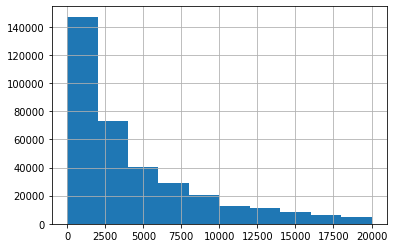

In [20]:
rb_df['price'].hist();

Alrededor de 70,000 autos cuestan menos de 500 euros. Esto es un error que debemos corregir para evitar problemas más adelante con nuestro modelo. 

Vamos a ver cómo podría ser el escenario ideal filtrando los valores atípicos de nuestra columna.

Total de valores atípicos:        36046
Distribución de valores atípicos: 10.179409048677378 %


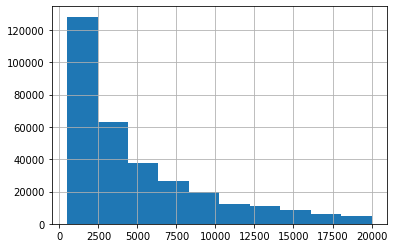

In [21]:
ref = 500
price_filter = rb_df.query('price >= @ref')
print("Total de valores atípicos:       ", rb_df.shape[0] - price_filter['price'].count())
print("Distribución de valores atípicos:", 36046/len(rb_df)*100,'%')
price_filter['price'].hist();

In [22]:
print("El promedio de price filter es:", price_filter['price'].mean())
print("La mediana de price filter es: ", price_filter['price'].median())

El promedio de price filter es: 4895.110459943218
La mediana de price filter es:  3200.0


Vamos a sustituir ese 10% de valores atípicos que no brindan información valiosa para nuestro set de datos por la mediana de nuestro set.

In [23]:
rb_df['price'] = rb_df['price'].mask(rb_df['price'] < 500, 2700)

Comprobamos cambios

2700    37573
500      5667
1500     5391
1000     4647
1200     4589
        ...  
4898        1
1209        1
3256        1
9149        1
8188        1
Name: price, Length: 3467, dtype: int64


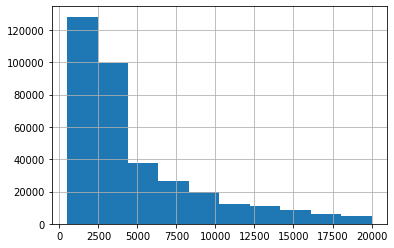

In [24]:
print(rb_df['price'].value_counts())
rb_df['price'].hist();

**Conclusiones**

- Se encontraron problemas en el nombre de las columnas y fueron solucionados.
- El tipo de dato en las fechas era object y se corrigio a datetime.
- Se eliminaron datos duplicados.
- Se imputaron valores nulos por medio de la frecuencia.
- Se corrigieron valores atípicos en la `columna price`
- Se corrgiieron errores en la columna `registration_year`

Revisemos la variable `registration_year`

In [25]:
rb_df['registration_year'].describe()

count    354107.000000
mean       2004.235355
std          90.261168
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: registration_year, dtype: float64

En un análisis rápido podemos identificar que hay dos inconvenientes, en el primero tenemos un valor mínimo de 1000 años mientras que por el otro lado el valor máximo es de 9999 años. Esto nos indica que hay un error en algunos valores dentro de esta columna. Vamos a investigar de qué se trata.

In [26]:
rb_df['registration_year'].unique()

array([1993, 2011, 2004, 2001, 2008, 1995, 1980, 2014, 1998, 2005, 1910,
       2016, 2007, 2009, 2002, 2018, 1997, 1990, 2017, 1981, 2003, 1994,
       1991, 1984, 2006, 1999, 2012, 2010, 2000, 1992, 2013, 1996, 1985,
       1989, 2015, 1982, 1976, 1983, 1973, 1111, 1969, 1971, 1987, 1986,
       1988, 1970, 1965, 1945, 1925, 1974, 1979, 1955, 1978, 1972, 1968,
       1977, 1961, 1960, 1966, 1975, 1963, 1964, 5000, 1954, 1958, 1967,
       1959, 9999, 1956, 3200, 1000, 1941, 8888, 1500, 2200, 4100, 1962,
       1929, 1957, 1940, 3000, 2066, 1949, 2019, 1937, 1951, 1800, 1953,
       1234, 8000, 5300, 9000, 2900, 6000, 5900, 5911, 1933, 1400, 1950,
       4000, 1948, 1952, 1200, 8500, 1932, 1255, 3700, 3800, 4800, 1942,
       7000, 1935, 1936, 6500, 1923, 2290, 2500, 1930, 1001, 9450, 1944,
       1943, 1934, 1938, 1688, 2800, 1253, 1928, 1919, 5555, 5600, 1600,
       2222, 1039, 9996, 1300, 8455, 1931, 1915, 4500, 1920, 1602, 7800,
       9229, 1947, 1927, 7100, 8200, 1946, 7500, 35

Podemos ver que hay valores erroneos. No pueden existir autos cuyo año de registro sea mayor a 2023 ya que es el año en el que nos encontramos actualmente y tampoco pueden haber autos antes de 1910 debido a que este fue el año en el que se inicia con la comercialización de vehículos. Por lo tanto, debemos corregir estos datos y para hacerlo vamos a utilizar el valor de la mediana pero primero hagamos un recuento de cuántos valores son los que están por encima del año 2023.

In [27]:
rb_df[rb_df['registration_year'] > 2023].count()

date_crawled          105
price                 105
vehicle_type          105
registration_year     105
gearbox               105
power                 105
model                 105
mileage               105
registration_month    105
fuel_type             105
brand                 105
not_repaired          105
date_created          105
number_of_pictures    105
postal_code           105
last_seen             105
dtype: int64

Tenemos 105 valores, ahora vamos a conocer la mediana y después vamos a reemplazar estos datos por un valor que tenga más sentido.

In [28]:
print("La mediana de la columna registration_year es:", rb_df['registration_year'].median())
# Reemplazamos valores
rb_df['registration_year'] = rb_df['registration_year'].mask(rb_df['registration_year'] > 2023, 2003)
# Comprobamos cambios
rb_df[rb_df['registration_year'] > 2023].count()

La mediana de la columna registration_year es: 2003.0


date_crawled          0
price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
mileage               0
registration_month    0
fuel_type             0
brand                 0
not_repaired          0
date_created          0
number_of_pictures    0
postal_code           0
last_seen             0
dtype: int64

Ahora veamos el otro lado de la moneda, los autos se inventaron en 1886 y fue aproximadamente hasta 1910 cuando aparece el primer automóvil sedan, por lo tanto los años por debajo de 1910 no serían correctos. Al igual que el paso anterior vamos a realizar un conteo de valores que están fuera de este límite y vamos a reemplazarlos por un valor que tenga más sentido como lo es el de la mediana.

In [29]:
rb_df[rb_df['registration_year'] < 1910].count()

date_crawled          66
price                 66
vehicle_type          66
registration_year     66
gearbox               66
power                 66
model                 66
mileage               66
registration_month    66
fuel_type             66
brand                 66
not_repaired          66
date_created          66
number_of_pictures    66
postal_code           66
last_seen             66
dtype: int64

Vamos a imputar por la mediana

In [30]:
rb_df['registration_year'] = rb_df['registration_year'].mask(rb_df['registration_year'] < 1910, 2003)

In [31]:
rb_df[rb_df['registration_year'] < 1910].count()

date_crawled          0
price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
mileage               0
registration_month    0
fuel_type             0
brand                 0
not_repaired          0
date_created          0
number_of_pictures    0
postal_code           0
last_seen             0
dtype: int64

**Columna Power**

Visualicemos algunas estadísticas sobre esta columna.

In [32]:
# Análisis estadístico de la columna
rb_df['power'].describe()

count    354107.000000
mean        110.089651
std         189.914972
min           0.000000
25%          69.000000
50%         105.000000
75%         143.000000
max       20000.000000
Name: power, dtype: float64

La columna power se refiere a CV que en la industria de los automóviles significa Caballos de Vapor. Después de un breve análisis podemos ver que existen algunos valores en ceros lo cuál nos indica que se trata de autos que no tienen potencia o fuerza para arrancar lo cuál no tendría sentido ya que ningún cliente desearía comprar un producto que no cumple su objetivo. Por otra parte el valor máximo es del 20 mil Caballos de Vapor, esto nos indica que el vehículo tiene un motor que practicamente no existe. 

Vamos analizar más de cerca estos valores.

0        40218
75       24001
60       15879
150      14571
101      13286
         ...  
323          1
3454         1
1056         1
13636        1
1158         1
Name: power, Length: 712, dtype: int64



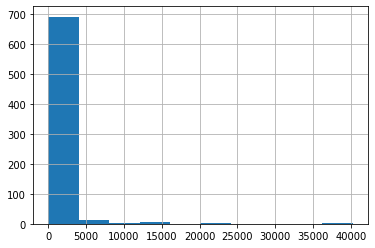

In [33]:
# Visualizamos los datos de la columna
print(rb_df['power'].value_counts())
print()
rb_df['power'].value_counts().hist();

Ahora podemos comprobar que existen alrededor de 40 mil autos que **no tienen datos** sobre la potencia, entonces vamos a reemplazar estos valores por el promedio de nuestra columna que para este caso es de **110 CV**

In [34]:
# Realizamos el reemplazo
rb_df['power'] = rb_df['power'].mask(rb_df['power'] < 60, 110)

Ahora vamos averiguar cuántos valores hay por encima de los **1800 CV** pues este es el límite de potencia para el auto súper deportivo Hannesey Vennom el cuál está catalogado como el auto más rápido del mundo. Una vez que sepamos el número de estos valores vamos a realizar una sustitución utilizando la mediana para estos valores atípicos.

El valor de la mediana para esta columna es de **105 CV.**

In [35]:
# Conteo de valores por encima de los 1800 CV
rb_df[rb_df['power'] > 1800].count()

date_crawled          146
price                 146
vehicle_type          146
registration_year     146
gearbox               146
power                 146
model                 146
mileage               146
registration_month    146
fuel_type             146
brand                 146
not_repaired          146
date_created          146
number_of_pictures    146
postal_code           146
last_seen             146
dtype: int64

In [36]:
# Reemplazamos valores atípicos por la mediana
rb_df['power'] = rb_df['power'].mask(rb_df['power'] > 1800, 105)

In [37]:
# Comprobamos cambios realizados
rb_df['power'].describe()

count    354107.000000
mean        123.652656
std          55.627087
min          60.000000
25%          97.000000
50%         110.000000
75%         141.000000
max        1800.000000
Name: power, dtype: float64

**Registration_Month**

Vamos a explorar un poco más la variable del mes de registro ya que nuestros números indican que hay valores números en ceros por lo que debemos ver en detalle este caso. Para comenzar vamos a ver la distribución que tienen los valores de esta característica.

In [38]:
rb_df['registration_month'].value_counts()

0     37347
3     34348
6     31471
4     29246
5     29131
7     27186
10    26076
12    24271
11    24167
9     23798
1     23202
8     22610
2     21254
Name: registration_month, dtype: int64

Podemos ver que existen un total de 37,347 registros con valores en ceros, esto es un error pues no existe el mes 0 en el calendario juliano que es el que actualmente nos rige. Vamos a corregir estos datos realizando un reemplazo por medio de la mediana cuyo valor se encuentra en el **mes número 6** y comprobamos los cambios enseguida.

In [39]:
rb_df['registration_month'].replace(0, 6)

0         6
1         5
2         8
3         6
4         7
         ..
354102    7
354103    1
354104    3
354105    3
354106    6
Name: registration_month, Length: 354107, dtype: int64

Ahora nuestras columnas numéricas han sido tratadas correctamente y hemos eliminado o sustituido los valores atípicos, vamos a realizar un último paso antes de pasar al entrenamiento de nuestros modelos.

### Visualización de Datos

En este apartado vamos a realizar una visualización, por un lado veremos las variables categóricas y en otro apartado veremos las variables numéricas con la intención de observar sus distribuciones ahora que ya hemos tenemos nuestro set de datos limpio. Lo primero que harémos será eliminar las características que definitivamente no tienen información valiosa para nuestro set de datos como son las de tipo **DateTime, number_of_pictures y postal_code**.

Después harémos una selección de las características por su tipo y finalmente las visualizaremos. Para no borrar toda la información vamos a realizar una copia de nuestro dataset limpio y trabajaremos sobre esa nueva copia, de esta manera en caso de que necesitemos volver será más fácil acceder al dataset original.

In [40]:
# Creamos copia del dataset original
df = rb_df.copy()

# Eliminamos características que no aportan valor
df = df.drop(['date_crawled', 'date_created', 'last_seen', 'number_of_pictures', 'postal_code'], axis=1)

In [41]:
# Seleccionamos Variables Categóricas
category = df.select_dtypes(include='object')
categorical_data = category.columns

# Revisamos los valores únicos de cada columna categórica
for col in categorical_data:
    print(f'{col}: {category[col].nunique()}')

vehicle_type: 8
gearbox: 2
model: 250
fuel_type: 7
brand: 40
not_repaired: 2


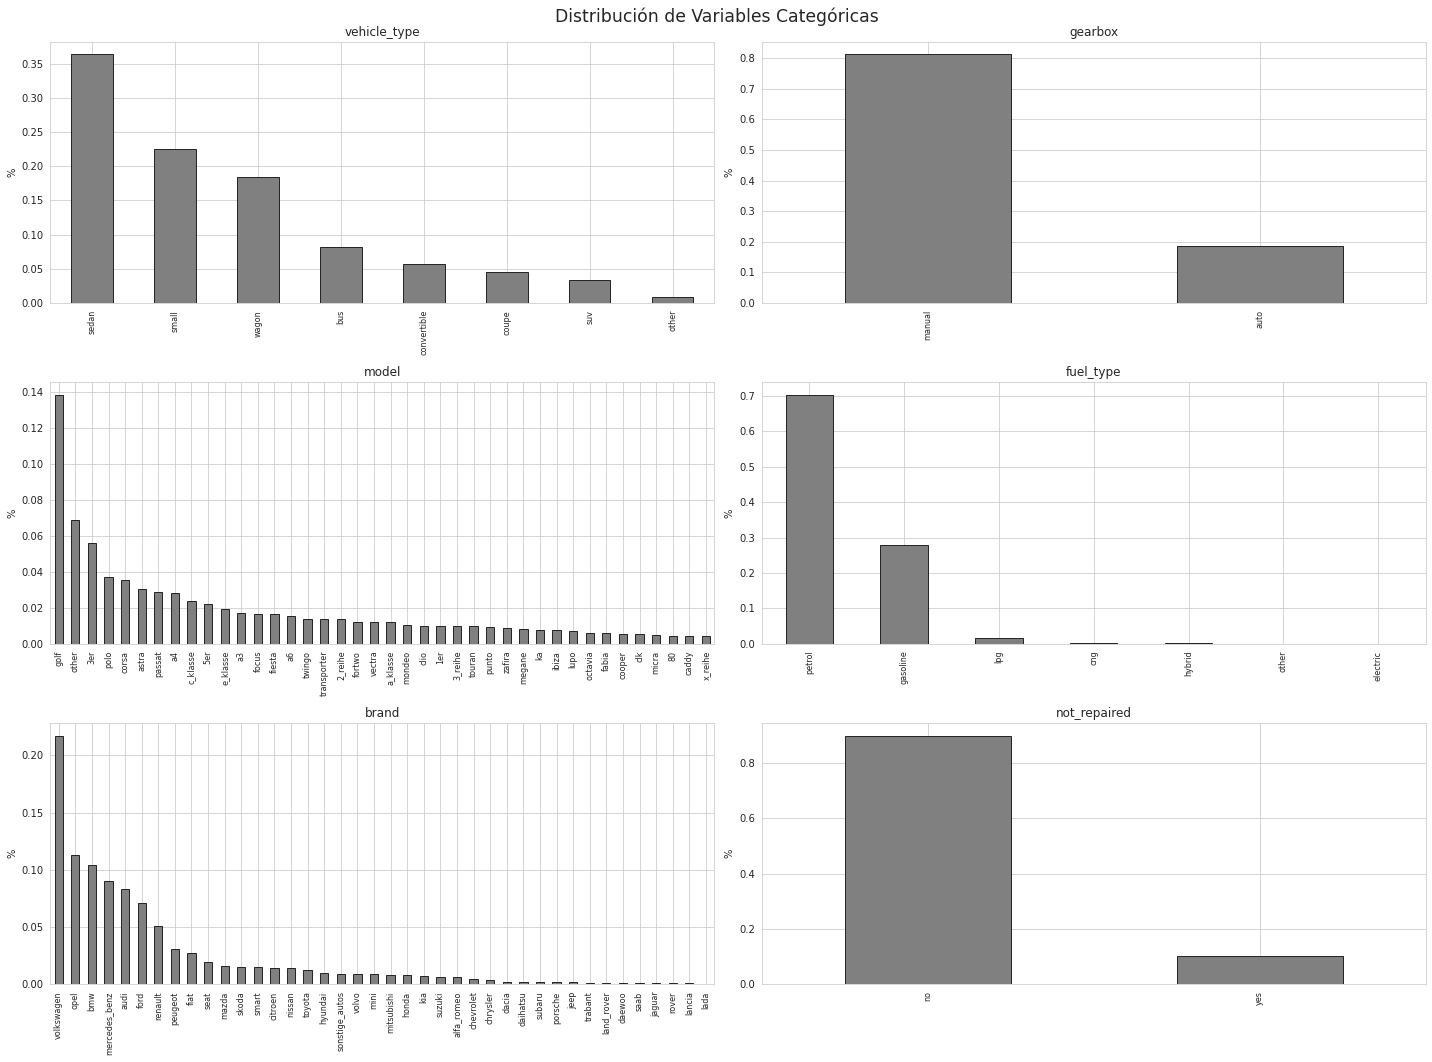

In [42]:
# Establecemos número de columnas y filas para nuestros subplots
a = 3 # Número de filas
b = 2 # Número de columnas
c = 1 # Inicialización del conteo de plots

# Definimos el tamaño de nuestra figura
fig = plt.subplots(figsize=(20,15))

# Construimos un bucle for que iterará sobre cada columna y debolverá un gráfico de barras
sns.set_style('whitegrid')
for i in category:
    plt.subplot(a, b, c)
    plt.title(i, fontsize=36)
    plt.ylabel('%')
    category[i].value_counts(normalize=True).head(40).plot(
        kind='bar', 
        title=i, 
        rot=90, 
        edgecolor='black', 
        color='grey', 
        linewidth=0.8
    )
    c = c+1
    plt.xticks(fontsize = 8)
    
    
plt.suptitle('Distribución de Variables Categóricas', fontsize='xx-large')
plt.tight_layout()
plt.show()    

- El `vehicle_type` que más tenemos es el sedán mientras que el menos recurrente es el que se encuentra en la **categoría de "otros"**.
- En la característica de `gearbox` más recurrente es del **tipo "manual"**.
- El `model` de autos más popular es la **Golf** mientras que la menos popular es la **x_rehie**.
- Los autos `fuel_type` es más recurrente es el **petrol/disel** mientras que el **auto eléctrico** es el menos popular.
- En cuanto a `brand`, la marca de moda es **Volkswagen** mientras que la menos popular **Lada**.
- Las `not_repaired` nos indican que la mayor parte de vehículos no han recibido alguna reparación.

Ahora vamos a explorar con la misma visualización las variables numéricas.

In [43]:
# Seleccionamos Variables Numéricas
number = df.select_dtypes(include='int')
numerical_data = number.columns

# Revisamos los valores promedio de cada columna categórica
for col in numerical_data:
    print(f'{col}: {number[col].mean()}')

price: 4671.661187155295
registration_year: 2003.0848048753626
power: 123.65265583566548
mileage: 128211.811684039
registration_month: 5.714182436382224


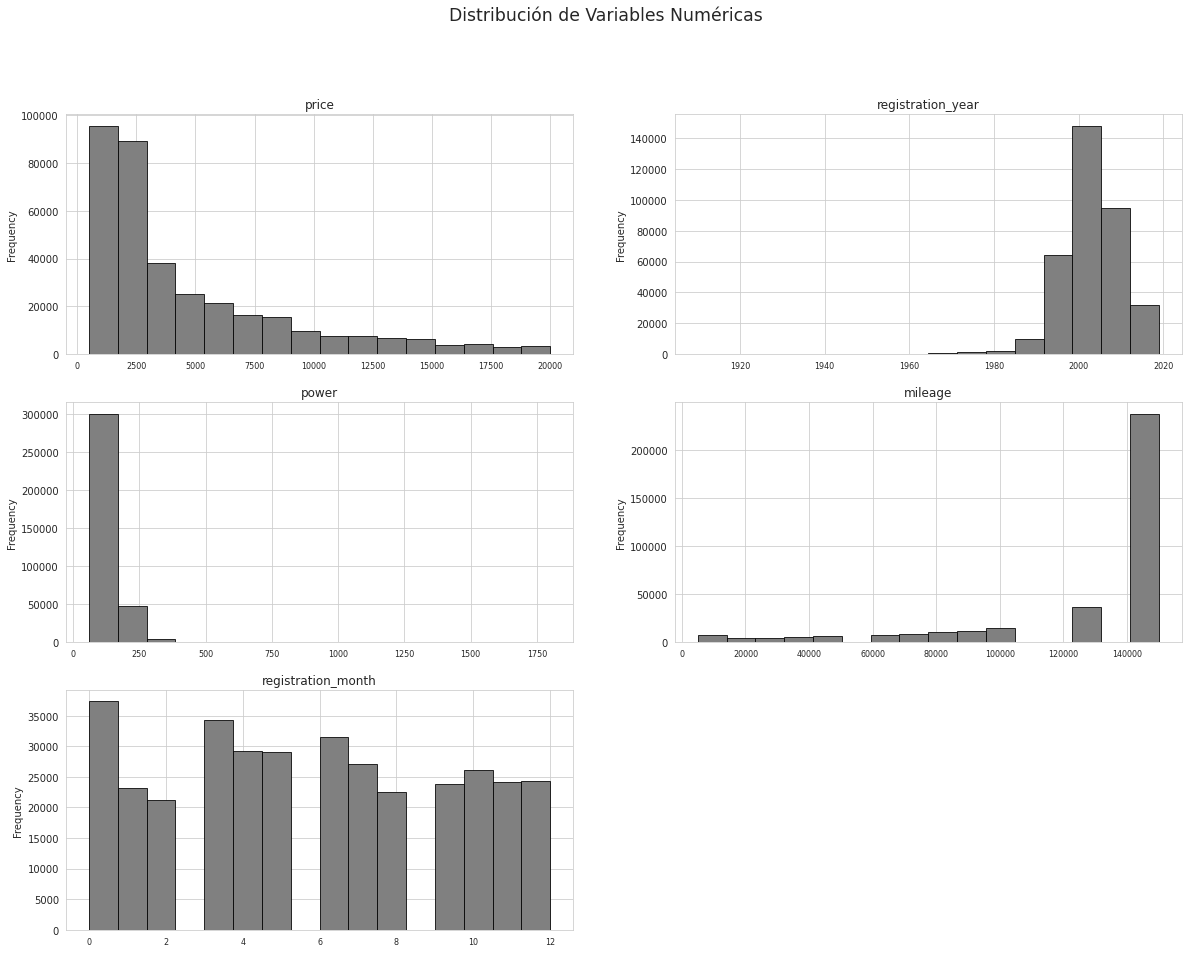

In [44]:
#----------------------------------
# Gráficos para Variables Numéricas
#----------------------------------

# Establecemos número de filas y columnas para nuestro subplot
a = 3 # Número de filas
b = 2 # Número de columnas
c = 1 # Inicialización del conteo de plots

# Definimos el tamaño de nuestra figura
fig = plt.subplots(figsize=(20,15))

# Construimos un bucle for que iterará sobre cada columna y debolverá un gráfico de barras
sns.set_style('whitegrid')
for i in number:
    plt.subplot(a, b, c)
    plt.title(i, fontsize=36)
    number[i].plot(
        kind='hist', 
        title=i, 
        bins=16, 
        edgecolor='black', 
        color='grey', 
        linewidth=0.8
    )
    
    c = c+1
    plt.xticks(fontsize = 8)
    
    
plt.suptitle('Distribución de Variables Numéricas', fontsize='xx-large')
plt.tight_layout
plt.show()

- La variable `price` presenta un sesgo a la derecha donde el promedio del precio es de **4,671 euros**.
- Para la variable `registration_year`los autos más antiguos son aquellos que provienen del año 1910 mientras que el más actual es del 2019. El **promedio se encuentra en el año 2003**.
- En el tema de la `potencia` la **mediana es de 110 CV** donde tenemos una **desviación estándar de 55 CV**.
- El kilometraje `mileage` promedio es de 128,211 millas recorridas que expresadas en kilometros serían alrededor de 80,000.
- La variable `registration_month` se divide en 4 bloques donde el **promedio** de los autos registrados se encuentra en **5.7 meses**.

### Matriz de Correlación de Pearson

Para finalizar nuestra primera etapa vamos a realizar y visualizar una matriz de correlación la cuál nos ayudará a seleccionar mejores variables al momento de entrenar a nuestro modelo. Primero crearemos nuestra matriz para poder observar con números las relaciones y después harémos un gráfico.

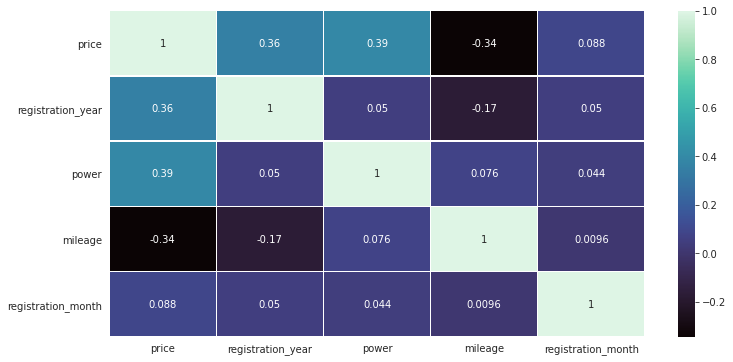

In [45]:
# Visualizamos la matríz de correlación
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='mako', linewidth=0.5)
plt.show();

- Se puede observar una correlación negativa en el kilometraje del vehículo, esto significa que a mayor precio del vehículo menor kilometraje tendrá.
- El año del registro tiene una correlación positiva establecida en 0.36 que nos indica una correlación más cercana al precio.
- La potencia es la variable que más se correlaciona con el precio.
- La variable que menos correlación tiene es el mes de registro en la plataforma.

## || Etapa Dos: Entrenamiento del modelo 
---

Ahora vamos a entrenar diferentes modelos con varios hiperparámetros. El punto principal de este paso es comparar métodos de potenciación del gradiente con bosque aleatorio, árbol de decisión y regresión lineal. Para ello debemos seleccionar en primer lugar nuestras variables a utilizar y después comenzaremos con el entrenamiento de una `Regresión Lineal` que servirá como modelo Dummy. Acto seguido entrenaremos 3 modelos con las librerías `CatBoost`, `LightGBM`y finalmente `XGBoost`.

Gracias al análisis previo sobre nuestra **Matriz de Correlación** ahora sabemos que las variables que tienen más relación respecto al precio son `registration_year`,  `power` y `mileage` así que vamos a seleccionarlas para entrenar a nuestros modelos.

> **Nota:** El tiempo obtenido a través del método time de python variará cada vez que se corra el kernel, así que los valores obtenidos serán aproximados.

In [46]:
# Seleccionamos las características con mayor relación a price.
feature_names = ['price','registration_year', 'power', 'mileage']

### Escalado de Características

Ahora vamos a escalar nuestras variables para que todas tengan el mismo peso para nuestro modelo. Para ello utilizaremos el formato de **Standard Scaler** de la librería **Scikit-Learn** y de esta manera nuestros datos estarán listos para pasar a la siguiente fase de split.

In [47]:
# Realizamos escalado de características
scaler    = StandardScaler().fit_transform(df[feature_names])
df_scaled = pd.DataFrame(scaler, columns=df[feature_names].columns)
df_scaled

,price,registration_year,power,mileage
0,-0.454789,-1.338306,-0.245432,0.574787
1,3.143553,1.050387,1.192718,-0.084730
2,1.182918,0.121451,0.707342,-0.084730
3,-0.731585,-0.276664,-0.874623,0.574787
4,-0.247193,0.652272,-0.982484,-1.008053
...,...,...,...,...
354102,-0.454789,0.254156,-0.245432,0.574787
354103,-0.570121,0.254156,-0.245432,-2.854701
354104,-0.801014,-0.409370,-0.407224,-0.084730
354105,1.044520,-0.940190,-0.389247,0.574787


### Split de Datos

Ahora para poder entrenar nuestros modelos debemos realizar la división de nuestro dataset a través de la herramienta **train_test_split** de la librería **Scikit-Learn** que nos permitirá cumplir con este objetivo. Para ello primero debemos seleccionar nuestras **Características** y después nuestro **Objetivo**. Finalmente realizar el split que vamos a configurar con una dimesión de **70/30**.

In [48]:
# Seleccionamos Características
features = df_scaled.drop('price', axis=1)
target   = df_scaled['price']

# Realizamos el Split
X_train, X_test, y_train, y_test = train_test_split(
    features, 
    target, 
    test_size = 0.3, 
    random_state = 42
)

print("Tamaño del Conjunto de Entrenamiento:", X_train.shape, y_train.shape)
print("Tamaño del Conjunto de Prueba:       ", X_test.shape, y_test.shape)

Tamaño del Conjunto de Entrenamiento: (247874, 3) (247874,)
Tamaño del Conjunto de Prueba:        (106233, 3) (106233,)


### REGRESIÓN LINEAL

La regresión lineal es un enfoque lineal para modelar la relación entre una respuesta escalar y una o más variables explicativas (también conocidas como variables dependientes e independientes ). Como todas las formas de análisis de regresión , la regresión lineal se centra en la distribución de probabilidad condicional de la respuesta dados los valores de los predictores, en lugar de la distribución de probabilidad conjunta de todas estas variables, que es el dominio del análisis multivariante.

En el sprint anterior descubrimos la forma de hacer nuestra propia regresión, ahora que ya sabemos cómo desarrollarla es momento de poner en marcha lo aprendido.

**FORMULACIÓN**

**Estimation**

$$\bar{y} = wx+b$$

**Calculating Error**

$$MSE = J(w,b) = \frac{1}{n} \sum_{i=1}^{n}(y_{i}-(wx_{i}+b))^2$$

**Updating Parameters**

$J'(m,b) = \begin{equation}
\begin{bmatrix}
\frac{df}{dw}\\
\frac{df}{db}
\end{bmatrix}
\end{equation}  =$ $\begin{equation}
\begin{bmatrix}
\frac{1}{n} \sum_{i=1}^{n}(y_{i}-2x_{i}(wx_{i}+b))\\
\frac{1}{n} \sum_{i=1}^{n}(y_{i}-2(wx_{i}+b))
\end{bmatrix}
\end{equation}$

$\frac{dj}{dw} = dw = \frac{1}{n} = \sum_{i=1}^{n}-2x_{i}(y_{i}- (wx_{i}+b)) = \frac{1}{n}\sum_{i=1}^{n}-2x_{i}(y_{i}- \bar{y}) = \frac{1}{n}\sum_{i=1}^{n}2x_{i}(\bar{y} - y_{i})$

$\frac{dj}{db} = db = \frac{1}{n} = \sum_{i=1}^{n}-2(y_{i}- (wx_{i}+b)) = \frac{1}{n}\sum_{i=1}^{n}-2(y_{i}-\bar{y}) = \frac{1}{n}\sum_{i=1}^{n}2(\bar{y} - y_{i})$

**Gradient Descent**

$$w=w-a*dw$$

$$b=b-a*db$$

In [49]:
class Linear_Regression:
    
    def __init__(self, lr = 0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.w) + self.b

            dw = (1/n_samples) * np.dot(X.T,(y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.w = self.w - self.lr * dw
            self.b = self.b - self.lr * db
    
    
    def predict(self, X):
        y_pred = np.dot(X, self.w) + self.b
        return y_pred

Gracias a las fórmulas anteriores hemos creado correctamente nuestro modelo de regresión líneal desde cero y ahora en el siguiente paso vamos a realizar las pruebas correspondientes para su uso, recordando que este modelo nos servirá como modelo dummy.

In [50]:
# Entrenamiento del modelo de regresión
#--------------------------------------
start_train = time.time()
reg = Linear_Regression()
reg.fit(X_train, y_train)
end_train = time.time()

# Calculamos las Predicciones
#----------------------------
start_test = time.time()
lr_predictions = reg.predict(X_test)
end_test = time.time()

# Establecemos el RECM para nuestra prueba de cordura
#----------------------------------------------------
RECM_lr = mean_squared_error(y_test, lr_predictions, squared=False)
print(f'RECM de la Regresión Lineal: {RECM_lr:.3f}')
print(f'Tiempo de Entrenamiento: {end_train - start_train:.3f} seg')
print(f'Tiempo de Prueba: {end_test - start_test:.3f} seg')

RECM de la Regresión Lineal: 0.818
Tiempo de Entrenamiento: 13.111 seg
Tiempo de Prueba: 0.075 seg


El modelo de regresión lineal devolvió RECM de 0.81, esta será nuestra prueba de cordura que servirá como indicador base para la comparación con los otros modelos y métodos de potenciación de gradiente. Si un modelo de potenciación de gradiente funciona peor que 0.81 entonces algo habrá salido mal.

### RANDOM FOREST REGRESSOR

Ahora probaremos el modelo del bosque aleatorio. Recordemos que Los árboles de decisión se utilizan tanto para problemas de regresión como de clasificación. Un bosque aleatorio se compone de muchos árboles de decisión. Fluyen visualmente como árboles, de ahí el nombre, y en el caso de regresión, comienzan con la raíz del árbol y siguen divisiones basadas en resultados variables hasta que se alcanza un nodo hoja y se da el resultado.

En el siguiente paso vamos a entrenar el modelo configurando un ajuste de hiperparámetros a través de la herramienta de **GridSearch** que viene incluída en la librería de **Scikit-Learn**. De esta manera podremos obtener los mejores resultados para nuestro modelo.

**AJUSTE DE HIPERPARÁMETROS**

In [51]:
# Establecer valores para hiperparámetros
#-------------------------------------------
h_params = {'n_estimators' : [10, 20, 40],
            'max_depth' : [1, 2, 3, 4, 5], 
            'random_state' : [42]}

# Llamamos a GridSearchCV y colocamos los valores de los hiperparámetros
# La métrica RECM y el valor de validación cruzada
#-----------------------------------------------------------------------
gridSearch_rf = GridSearchCV(estimator = RandomForestRegressor(), 
                             param_grid = h_params, 
                             scoring = 'neg_root_mean_squared_error', 
                             cv=5)

In [52]:
# Entrenamiento de GridSearch
#----------------------------
start_tr = time.time()
gridSearch_rf.fit(X_train, y_train)
end_tr = time.time()

print(f"Tiempo de ajuste de hiperparámetros Random Forest: {end_tr-start_tr:.3f} seg")

Tiempo de ajuste de hiperparámetros Random Forest: 110.803 seg


In [53]:
# Buscar los mejores hiperparámetros que devolvió el valor más bajo de RECM
#--------------------------------------------------------------------------
max_score = gridSearch_rf.cv_results_['mean_test_score'].max()
index_max_score = np.where(gridSearch_rf.cv_results_['mean_test_score'] == max_score)[0][0]

best_set_params = gridSearch_rf.cv_results_['params'][index_max_score]

print(f"Mejores Hiperparámetros del Modelo: {best_set_params} | Mejor RECM: {-max_score:.3f}")

Mejores Hiperparámetros del Modelo: {'max_depth': 5, 'n_estimators': 20, 'random_state': 42} | Mejor RECM: 0.570


**ENTRENAMIENTO DE MODELO**

In [54]:
# Entrenamiento del Modelo Random Forest
#----------------------------
start_tr_rf = time.time()
rf_model = RandomForestRegressor(max_depth=5, n_estimators=20, random_state=42)
rf_model.fit(X_train, y_train)
end_tr_rf = time.time()

# Calculamos las Predicciones
#----------------------------
start_ts_rf = time.time()
rf_predictions = rf_model.predict(X_test)
end_ts_rf = time.time()

# Establecemos el RECM para nuestra prueba de cordura
#----------------------------------------------------
RECM_rf = mean_squared_error(y_test, rf_predictions, squared=False)
print(f'RECM de Random Forest: {RECM_rf:.3f}')
print(f'Tiempo de Entrenamiento: {end_tr_rf - start_tr_rf:.3f} seg')
print(f'Tiempo de Prueba: {end_ts_rf - start_ts_rf:.3f} seg')

RECM de Random Forest: 0.570
Tiempo de Entrenamiento: 2.425 seg
Tiempo de Prueba: 0.098 seg


Para el modelo del **Random Forest** los mejores parámetros fueron [max_depth=5, n_estimators=20] con un tiempo de 3 segundos y una **RECM de 0.57** que mejora bastante con respecto a la regresión lineal.

### Cat Boost

CatBoost es un **método de potenciación de gradiente** que utiliza un algoritmo voraz o greedy method para dividir sus árboles, es decir seleccionrá aquella división de árbol que tenga la mejor penalización sin importar cómo esta decisión contribuye en la solución general óptima del modelo. A su vez, este modelo se basa en **árboles simétricos** que presentan una división consistente de nodos a la misma profundidad del árbol. Y lo más importante de este árbol es que no requiere de un **preprocesamiento de características categóricas** por lo que no es necesario aplicar OHE o alguna codificación de etiquetas ya que el propio método asigna etiquetas a través del uso de permutaciones del conjunto de datos. Es así como trabajamos con nuestro dataset final y pasaremos una lista de características categoricas al entrenar el modelo. 

In [55]:
# Establecemos las Características y Objetivo apartir del Dataset Original
#-------------------------------------------------------------------------
x = df.drop('price', axis=1)
y = df['price']

# Realizamos la División de Datos/Split
#--------------------------------------
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

# Comprobamos que los Datos se Dividieron Corractamente
#------------------------------------------------------
print("Tamaño del Conjunto de Entrenamiento:", Xc_train.shape, yc_train.shape)
print("Tamaño del Conjunto de Prueba:       ", Xc_test.shape, yc_test.shape)

Tamaño del Conjunto de Entrenamiento: (247874, 10) (247874,)
Tamaño del Conjunto de Prueba:        (106233, 10) (106233,)


**AJUSTE DE HIPERPARÁMETROS**

In [56]:
# Definimos las Características Categóricas
#------------------------------------------
cat_features = ['vehicle_type',
                'gearbox',
                'model',
                'fuel_type',
                'brand',
                'not_repaired']

# Establecemos los hiperparámetros que vamos ajustar
#---------------------------------------------------
params_catboost = {'depth': [4, 6, 10], 
                   'learning_rate': [0.1, 0.2, 0.5]}

# Llamamos al estimador que utilizarémos para este caso Catboost Regressor y pasamos GridSerchCV
#-----------------------------------------------------------------------------------------------
catboost_est = CatBoostRegressor(iterations=100, cat_features=cat_features, verbose=False, loss_function='RMSE')

gridSearch_catboost = GridSearchCV(estimator=catboost_est,
                                   param_grid=params_catboost, 
                                   scoring='neg_root_mean_squared_error', 
                                   cv=3)

# Entrenamos el Modelo en Búsqueda de los Hiperparámetros que lancen el mejor RECM
#---------------------------------------------------------------------------------
start_gs = time.time()
gridSearch_catboost.fit(Xc_train, yc_train)
end_gs = time.time()
print(f'Tiempo de Entrenamiento: {end_gs-start_gs:.3f} seg')

Tiempo de Entrenamiento: 398.648 seg


In [57]:
# Buscamos los mejores Hipermarámetros del Modelo
#------------------------------------------------
max_score_cb = gridSearch_catboost.cv_results_['mean_test_score'].max()
index_max_score_cb = np.where(gridSearch_catboost.cv_results_['mean_test_score'] == max_score_cb)[0][0]

best_cb_set_params = gridSearch_catboost.cv_results_['params'][index_max_score_cb]

print(f"Mejores Hiperparámetros del Modelo: {best_cb_set_params} | Mejor RECM: {-max_score_cb:.3f}")

Mejores Hiperparámetros del Modelo: {'depth': 10, 'learning_rate': 0.5} | Mejor RECM: 1746.250


**ENTRENAMIENTO DEL MODELO**

In [58]:
# Entrenamos Modelo con los Mejores Hiperparámetros y
# Realizamos Predicciones en el Conjunto de Pruebas
#---------------------------------------------------
catboost_model = CatBoostRegressor(iterations=100,
                                   depth=10,
                                   learning_rate=0.5,
                                   loss_function='RMSE',
                                   random_seed=42)


start_cb = time.time()
catboost_model.fit(Xc_train, yc_train, cat_features=cat_features, verbose=False)
end_cb = time.time()

start_cb_tp = time.time()
cb_predictions = catboost_model.predict(Xc_test)
end_cb_tp = time.time()

RECM_catboost = mean_squared_error(yc_test, cb_predictions, squared=False)
print(f'RECM de CatBoost: {RECM_catboost:.3f}')
print(f'Tiempo de Entrenamiento: {end_cb-start_cb:.3f} seg')
print(f'Tiempo de Prueba: {end_cb_tp-start_cb_tp:.3f} seg')

RECM de CatBoost: 1721.347
Tiempo de Entrenamiento: 30.848 seg
Tiempo de Prueba: 0.204 seg


### Light GBM Regressor

El método de potenciación de gradiente **LightGBM** utiliza árboles asimétricos y depende de los cálculos del árbol, por lo que divide la hoja del árbol con el mejor ajuste, de esta manera se produce una mayor precisión y disminuye los errores que pueden ocurrir al utilizar el cálculo por niveles. Al igual que **Catboost**, LightGBM puede procesar características categóricas, pero no utiliza **One-Hot Encodig**. Es necesario transformar las características a tipo entero, ya que no acepta variables de tipo string u objeto, también se puede optar por cambiar las características categoricas a tipo **Category**, que es lo que vamos a realizar a continuación para entrenar nuestro modelo.

In [59]:
# Transformamos características categóricas a tipo "category"
#------------------------------------------------------------
for feature in categorical_data:
    df[feature] = df[feature].astype('category')
    
# Obtenemos las características y objetivo apartir de nuestra copia del dataset
#------------------------------------------------------------------------------
x_lgbm = df.drop('price', axis=1)
y_lgbm = df['price']

# Dividimos en Conjunto de Entrenamiento y
# Conjunto de Prueba
#-----------------------------------------
X_train_lgbm, X_test_lgbm, y_train_lgbm, y_test_lgbm = train_test_split(
    x_lgbm, y_lgbm, test_size=0.3, random_state=42)

# Comprobamos que los Datos se Dividieron Correctamente
#------------------------------------------------------
print("Tamaño del Conjunto de Entrenamiento:", X_train_lgbm.shape, y_train_lgbm.shape)
print("Tamaño del Conjunto de Prueba:       ", X_test_lgbm.shape, y_test_lgbm.shape)

Tamaño del Conjunto de Entrenamiento: (247874, 10) (247874,)
Tamaño del Conjunto de Prueba:        (106233, 10) (106233,)


**AJUSTE DE HIPERPARÁMETROS**

In [60]:
# Establecemos los hiperparámetros que vamos ajustar
#---------------------------------------------------
params_lightgbm = {'n_estimators' : [200, 500], 
                   'learning_rate': [0.1, 0.2, 0.5],
                   'num_leaves'   : [10, 20]
                  }

# Llamamos al estimador que vamos a utilizar y
# Llamamos a GridSearchCV
#-------------------------------------------
lightgbm_est = LGBMRegressor()

gridSearch_lightgbm = GridSearchCV(
    estimator  = lightgbm_est,
    param_grid = params_lightgbm, 
    scoring    = 'neg_root_mean_squared_error', 
    cv = 3
)

# Entrenamos el Modelo en Búsqueda de los Hiperparámetros que lancen el mejor RECM
#---------------------------------------------------------------------------------
start_lgbm = time.time()
gridSearch_lightgbm.fit(X_train_lgbm, y_train_lgbm)
end_lgbm = time.time()
print(f'Tiempo de Entrenamiento: {end_lgbm-start_lgbm:.3f} seg')

Tiempo de Entrenamiento: 271.924 seg


In [61]:
# Buscamos los mejores Hipermarámetros del Modelo
#------------------------------------------------
max_score_lgbm = gridSearch_lightgbm.cv_results_['mean_test_score'].max()
index_max_score_lgbm = np.where(gridSearch_lightgbm.cv_results_['mean_test_score'] == max_score_lgbm)[0][0]

best_lgbm_set_params = gridSearch_lightgbm.cv_results_['params'][index_max_score_lgbm]

print(f"Mejores Hiperparámetros del Modelo: {best_lgbm_set_params} | Mejor RECM: {-max_score_lgbm:.3f}")

Mejores Hiperparámetros del Modelo: {'learning_rate': 0.2, 'n_estimators': 500, 'num_leaves': 20} | Mejor RECM: 1693.537


**ENTRENAMIENTO DEL MODELO**

In [62]:
# Entrenamos Modelo con los Mejores Hiperparámetros y
# Realizamos Predicciones en el Conjunto de Pruebas
#---------------------------------------------------
lightgbm_model   = LGBMRegressor(
    n_estimators = 500,
    learning_rate= 0.2,
    num_leaves   = 20,
    random_seed  = 42)


start_ltr = time.time()
lightgbm_model.fit(X_train_lgbm, y_train_lgbm)
end_ltr = time.time()

start_lts = time.time()
lgbm_predictions = lightgbm_model.predict(X_test_lgbm)
end_lts = time.time()

RECM_lightgbm = mean_squared_error(y_test_lgbm, lgbm_predictions, squared=False)
print(f'RECM de LightGBM: {RECM_lightgbm:.3f}')
print(f'Tiempo de Entrenamiento: {end_ltr-start_ltr:.3f} seg')
print(f'Tiempo de Prueba: {end_lts-start_lts:.3f} seg')

RECM de LightGBM: 1667.488
Tiempo de Entrenamiento: 10.393 seg
Tiempo de Prueba: 4.008 seg


### XGBoost

XGBoost es un método de potenciación de gradiente que utiliza árboles asímetricos al igual que **LightGBM**, pero se diferencia en la forma como crecen sus árboles, los cuales crecen por niveles no por sus hojas por lo que se obtienen árboles más complejos y grandes que hace que el modelo tome más tiempo en realizar predicciones y entrenarse. Así mismo a diferencia de LightGBM y CatBoost, XGBoost no tiene su propia implementación para características categóricas y solo acepta características numéricas, por lo que requiere un preprocesamiento a través de One-Hot encoding para poder procesar datos categóricos. Por esta razón utilizaremos nuestro conjunto de entrenamiento, y prueba que ya fueron codificados a través de OHE para la Regresión Líneal.

**AJUSTE DE HIPERPARÁMETROS**

In [63]:
# Establecemos los hiperparámetros que vamos ajustar
#---------------------------------------------------
params_xgboost = {
    'max_depth' : [4, 6, 8], 
    'n_estimators': [25, 50]
}

# Llamamos al estimador que vamos a utilizar y
# Llamamos a GridSearchCV
#-------------------------------------------
xgboost_est = XGBRegressor()

gridSearch_xgboost = GridSearchCV(
    estimator  = xgboost_est,
    param_grid = params_xgboost, 
    scoring    = 'neg_root_mean_squared_error', 
    cv = 3
)

# Entrenamos el Modelo en Búsqueda de los Hiperparámetros que lancen el mejor RECM
#---------------------------------------------------------------------------------
start_xgb = time.time()
gridSearch_xgboost.fit(X_train, y_train)
end_xgb = time.time()
print(f'Tiempo de Entrenamiento: {end_xgb-start_xgb:.3f} seg')

Tiempo de Entrenamiento: 107.744 seg


In [64]:
# Buscamos los mejores Hipermarámetros del Modelo
#------------------------------------------------
max_score_xgb = gridSearch_xgboost.cv_results_['mean_test_score'].max()
index_max_score_xgb = np.where(gridSearch_xgboost.cv_results_['mean_test_score'] == max_score_xgb)[0][0]

best_xgb_set_params = gridSearch_xgboost.cv_results_['params'][index_max_score_xgb]

print(f"Mejores Hiperparámetros del Modelo: {best_xgb_set_params} | Mejor RECM: {-max_score_xgb:.3f}")

Mejores Hiperparámetros del Modelo: {'max_depth': 8, 'n_estimators': 50} | Mejor RECM: 0.492


**ENTRENAMIENTO DEL MODELO**

In [65]:
# Entrenamos Modelo con los Mejores Hiperparámetros y
# Realizamos Predicciones en el Conjunto de Pruebas
#---------------------------------------------------
xgboost_model = XGBRegressor(
    n_estimators = 50,
    max_depth    = 8,
    random_state = 42)


start_tr_xgb = time.time()
xgboost_model.fit(X_train, y_train)
end_tr_xgb = time.time()

start_ts_xgb = time.time()
xgb_predictions = xgboost_model.predict(X_test)
end_ts_xgb = time.time()

RECM_xgboost = mean_squared_error(y_test, xgb_predictions, squared=False)
print(f'RECM de XGBoost: {RECM_xgboost:.3f}')
print(f'Tiempo de Entrenamiento: {end_tr_xgb-start_tr_xgb:.3f} seg')
print(f'Tiempo de Prueba: {end_ts_xgb-start_ts_xgb:.3f} seg')

RECM de XGBoost: 0.488
Tiempo de Entrenamiento: 13.301 seg
Tiempo de Prueba: 0.314 seg


## || Etapa Tres: Análisis de Modelos
---

### RECM

Una medida de uso frecuente de las diferencias entre los valores (valores de muestra o de población) predichos por un modelo o un estimador y los valores observados. La RECM representa la raíz cuadrada del segundo momento de la muestra de las diferencias entre los valores previstos y los valores observados o la media cuadrática de estas diferencias. Esta será la métrica base que utilizaremos para evaluar el rendimiento de nuestros modelos.

$$RECM = \sqrt ECM = \sqrt\frac{1}{n}\sum_{i=1}^{n} (\bar{y} - y)^2 $$

### Resultados

Una vez entrenados nuestros modelos vamos hacer un análsis de su calidad y velocidad. Para visualizar esto trazaremos una tabla con los valores de tiempo registrados tanto en el ajuste de parámetros, entrenamiento y prueba. Como ya se mencionó anteriormente el tiempo puede variar al correr el kernel por lo que los valores descritos en la tabla deben considerarse como aproximados. También incluiremos el resultado del RECM que nos ayudará a determinar cuál es el modelo con el mejor rendimiento. Por otro lado vamos a trazar gráficos de barras que nos ayuden a visualizar mejor los resultados obtenidos.

In [66]:
# Trazamos una Tabla con los Resultados del RECM obtenidos
#---------------------------------------------------------
models_table = pd.DataFrame({
    'modelo' : ['Regresión_Lineal', 'Random Forest', 'CatBoost', 'LightGBM', 'XGBoost'],
    'tiempo_ajuste_hiperparámetros' : [0, 115.842, 412.858, 408.525, 142.588],
    'tiempo_de_entrenamiento' : [13.707, 2.312, 31.243, 16.561, 21.178],
    'tiempo_de_prueba' : [0, 0.097, 0.194, 4.195, 0.326], 
    'RECM' : [RECM_lr, RECM_rf, RECM_catboost, RECM_lightgbm, RECM_xgboost]
})

models_table

,modelo,tiempo_ajuste_hiperparámetros,tiempo_de_entrenamiento,tiempo_de_prueba,RECM
0,Regresión_Lineal,0.000,13.707,0.000,0.818476
1,Random Forest,115.842,2.312,0.097,0.570293
2,CatBoost,412.858,31.243,0.194,1721.347022
3,LightGBM,408.525,16.561,4.195,1667.488018
4,XGBoost,142.588,21.178,0.326,0.487599


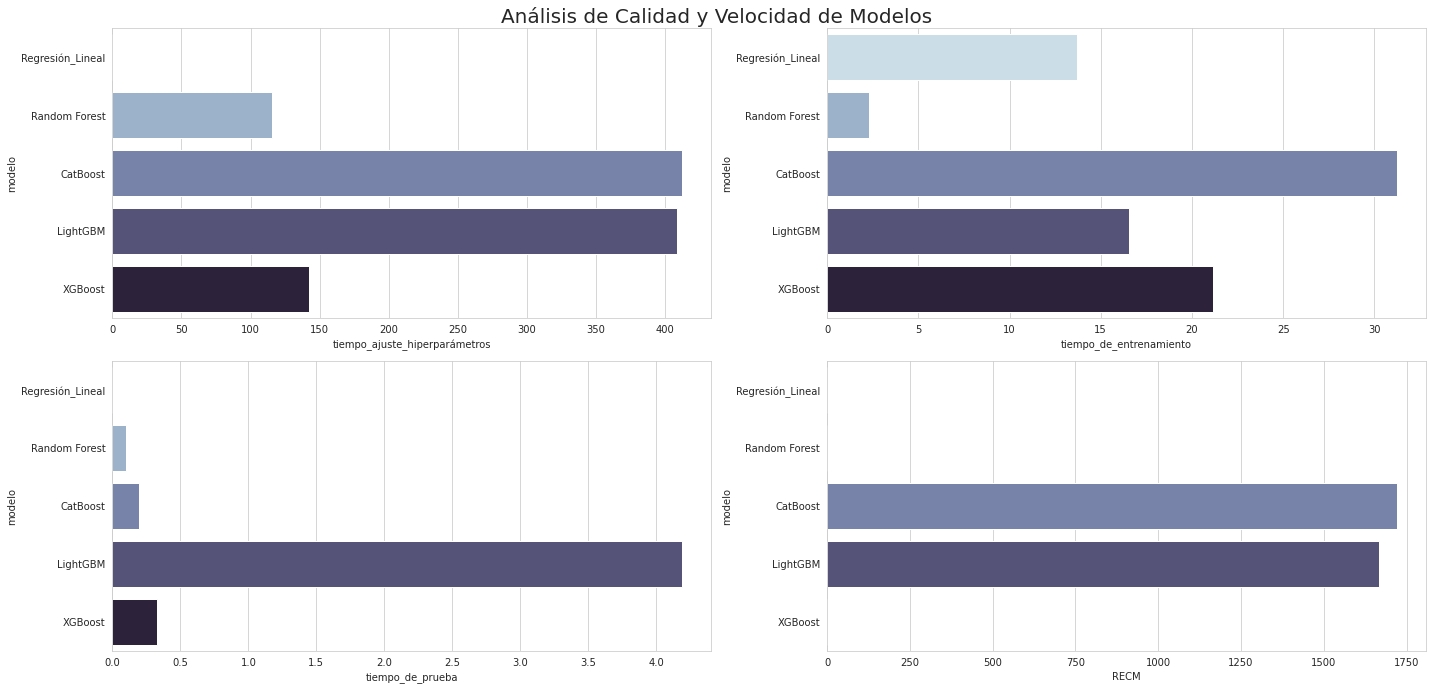

In [67]:
# Desarrollamos Gráficos de Barras
#---------------------------------

fig = plt.subplots(nrows=2, ncols=2, figsize=(20,14))
sns.set_style('whitegrid')

for n, col in enumerate(['tiempo_ajuste_hiperparámetros', 'tiempo_de_entrenamiento', 'tiempo_de_prueba','RECM']):
    ax = plt.subplot(3, 2, n+1)
    sns.barplot(x=col, y='modelo', data=models_table, ax=ax, palette=("ch:s=.25,rot=-.25"))
plt.suptitle('Análisis de Calidad y Velocidad de Modelos', fontsize=20)
plt.tight_layout()
plt.show()

## || Conclusiones
---

Después de pasar un gran tiempo analizando este grandioso proyecto llegamos a las siguientes conclusiones:

1. Se llevo a cabo trabajo de limpieza de datos donde corregimos valores ausentes y valores duplicados en el set de datos. Además se corrigieron los nombres de las columnas al tipo **"snake_case"**.
2. Se corrigieron los tipos de columnas de fechas que se encontraban en formato de object y se transformaron a tipo datetime durante la importación del dataset. Además se corrigieron datos con valores atípicos en las columnas de `price`, `registration_year` y `power`.
3. Desarrollamos nuestro propio modelo de regresión líneal como modelo dummy para evaluar la calidad y velocidad de los demás modelos.

**Entrenamiento de Modelos**

4. Se entrenaron cinco modelos: **Linear Regresion, Random Forest, CatBoost, LightGBM, XGBoost**. Para cada modelo se ajustaron hiperparámetros con la implementación de GridSearchCV y basados en los resultados de los mejores hiperparámetros se entrenó cada modelo y se realizaron predicciones. Se midió el tiempo de ajuste, entrenamiento y prueba, ya que a **Rusty Bargain** le interesa un modelo que no solo cuente con calidad sino también con velocidad.
5. Para cada uno de los modelos se utilizaron técnicas de preprocesamiento de datos diferentes, por ejemplo **Linear Regressor, Random Forest y XGBoost** se entrenaron con características basadas en la **correlación de pearson** mientras que los modelos **CatBoost y LightGBM** se utilizaron todas las características debido a que estos modelos aceptan todas las características y pueden procesarlas sin ningún problema.
6. Considerando la velocidad y el rendimiento de todos los modelos pensamos que **LightGBM** resulta ser el mejor modelo para esta prueba ya que cuenta con una velocidad de entrenamiento de tan solo 16 segundos y una **RECM** de 1667 considerando que se procesaron todas las características.

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter

- [x]  Jupyter Notebook está abierto
- [x]  El código no tiene errores
- [x]  Las celdas con el código han sido colocadas en orden de ejecución
- [x]  Los datos han sido descargados y preparados
    - [x] Corrección de nombres en columnas
    - [x] Corrección de valores duplicados
    - [x] Imputación de valores nulos
- [x]  Los modelos han sido entrenados
- [x]  Se realizó el análisis de velocidad y calidad de los modelos

## || Bibliografía
---

- ¿Cilindrada, Caballos y Par Motor?. Goodyear(2/Mar/2018). https://kilometrosquecuentan.goodyear.eu/coche-mas-potente-mundo/#:~:text=Hennessey%20Venom%20F5&text=Dispone%20de%20un%20motor%20V8,m%C3%A1xima%20de%20484%20km%2Fh.


- ¿Cuál es la potencia ideal para un coche?.Mapfre(20/Mar/22).https://www.motor.mapfre.es/coches/noticias-coches/potencia-ideal-para-el-coche/


- Cat_Boost_Regresor(Unknown Year). https://catboost.ai/en/docs/concepts/python-reference_catboostregressor


- Light_GBM_Regressor. https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html